In [ ]:
# Importing Packages

import pandas as pd
import numpy as np 

from exporarative_data_analysis.basic_data_analysis import DataTypes_Analysis
from exporarative_data_analysis.basic_data_analysis import Summary_Statistics_Analysis
from exporarative_data_analysis.basic_data_analysis import Data_Analyzer

from exporarative_data_analysis._2features_analysis import FeaturesAnalyzer
from exporarative_data_analysis._2features_analysis import NumericalVsNumerical
from exporarative_data_analysis._2features_analysis import CategoricalVsNumerical

from exporarative_data_analysis.features_analysis import FeatureAnalyzer
from exporarative_data_analysis.features_analysis import CategoricalFeature
from exporarative_data_analysis.features_analysis import NumericalFeature

from exporarative_data_analysis.multi_features_analysis import MultiFeatureAnalyzer

from exporarative_data_analysis.missing_values import Missing_Value_Analysis





# Setting Display options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [35]:
# Load The data  from extracted_dat

data_path = '../extracted_data/Housing.csv'
df = pd.read_csv(data_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
# STEP 1 : Basic Data Analysis

# Initilize  Data Analyzer with Specific strategy
analyzer = Data_Analyzer(DataTypes_Analysis())
analyzer.execute_analysis(df)




Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [37]:
 # Change strategy to summary Statistics and execute
analyzer.set_strategy(Summary_Statistics_Analysis())
analyzer.execute_analysis(df)


 Summary Statistics (Numerical Features):
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  

 Summary Statistics (Categorical Features):
       mainroad guestroom basement hotwaterheating airconditioning prefare

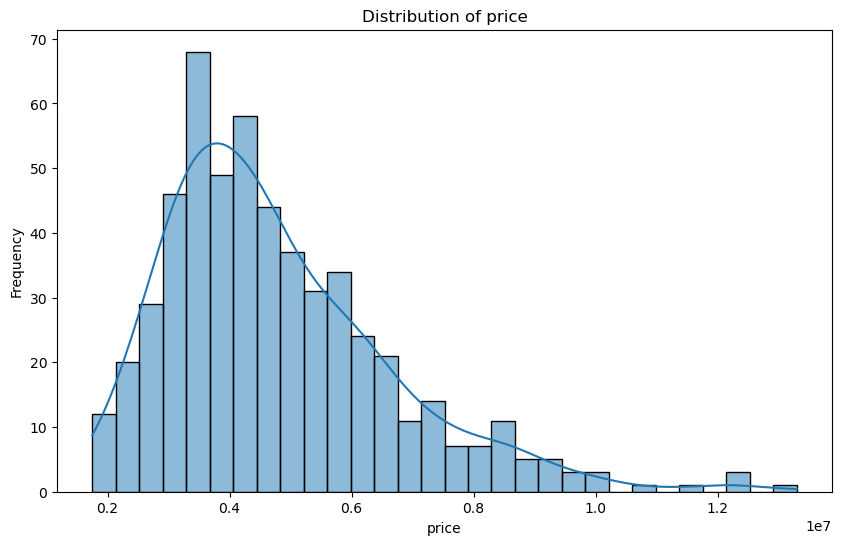

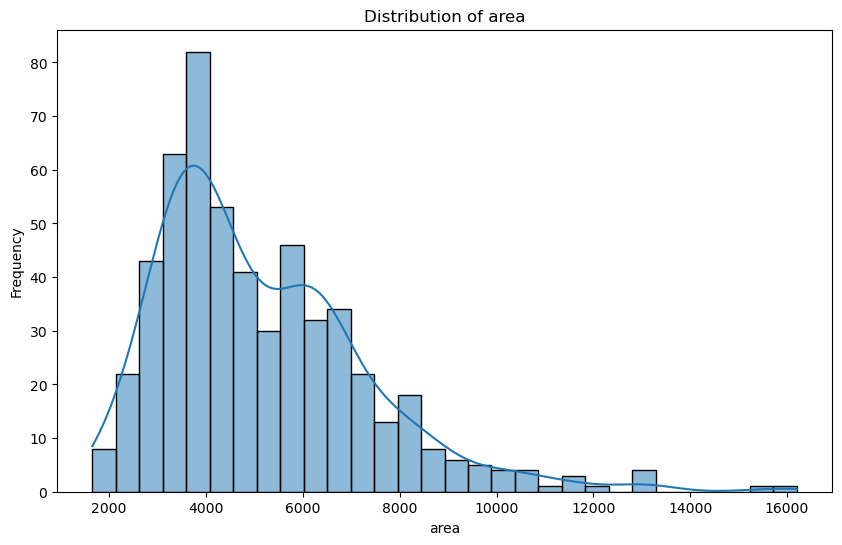

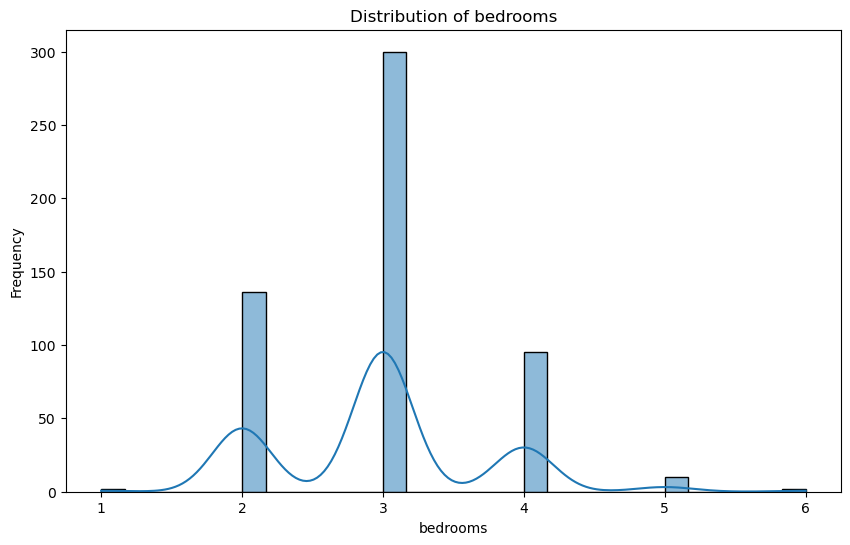

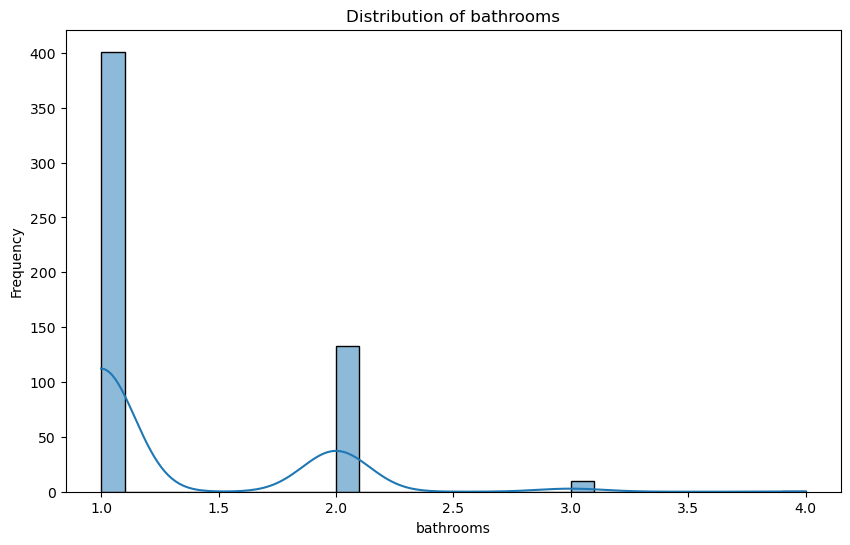

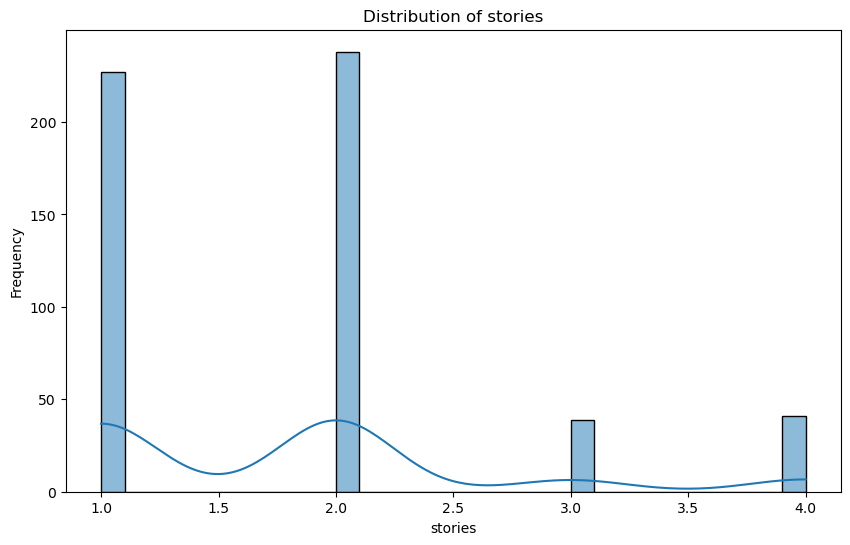

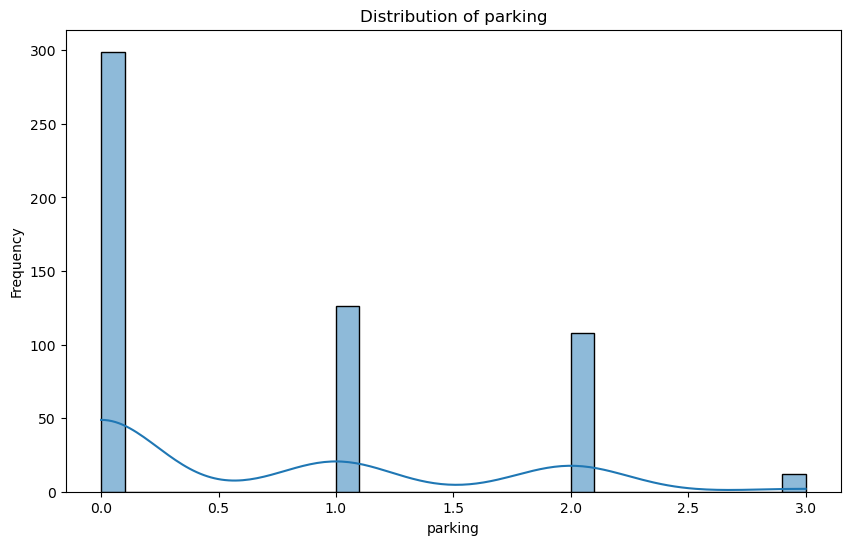

In [38]:
# STEP 2: Feature Analysis

# Capture all numerical and categorical features
numerical_features = df.select_dtypes(include=['int', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Analyze numerical features 
for feature in numerical_features:
    analyzer = FeatureAnalyzer(NumericalFeature())
    analyzer.execute_analysis(df, feature)



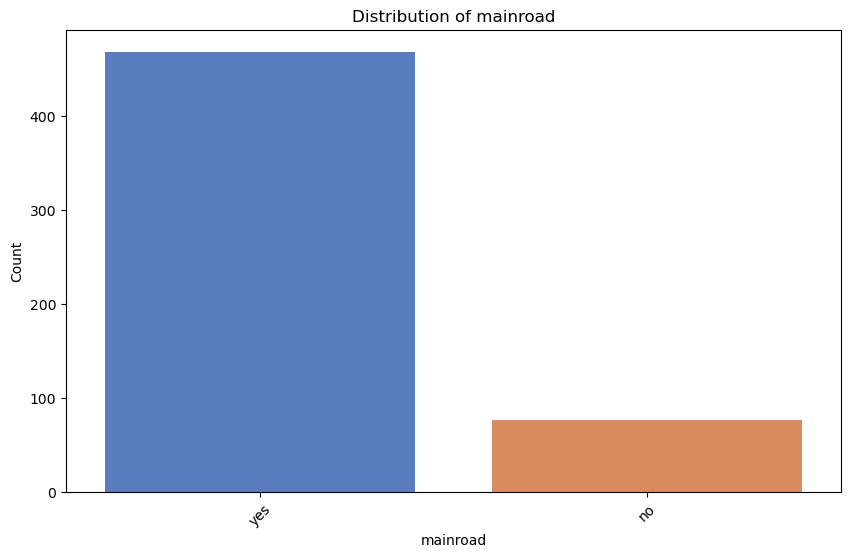

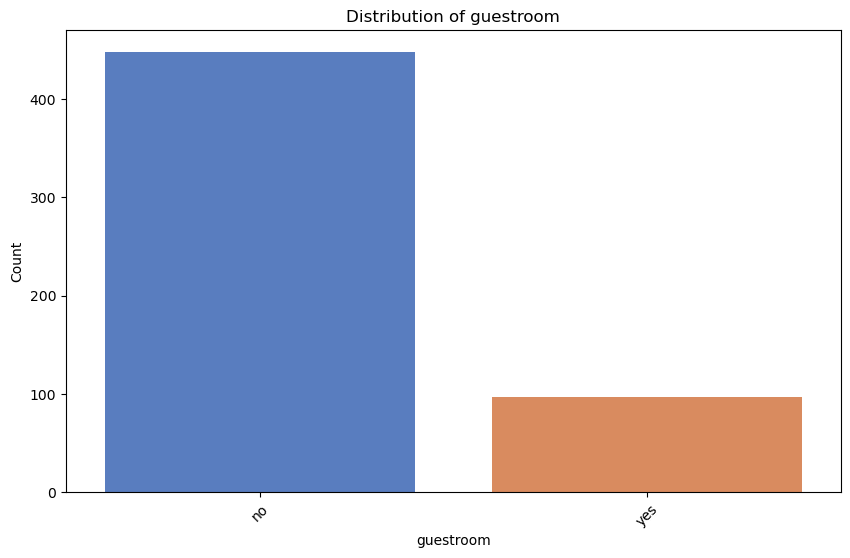

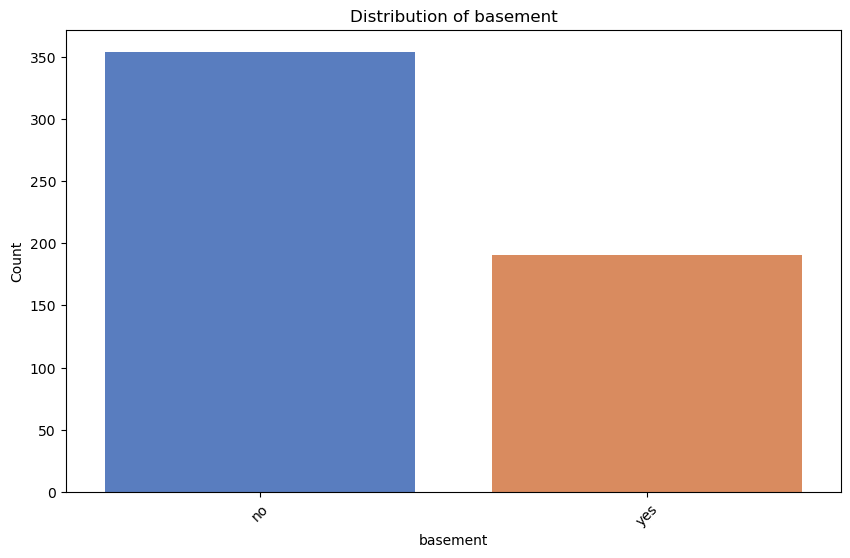

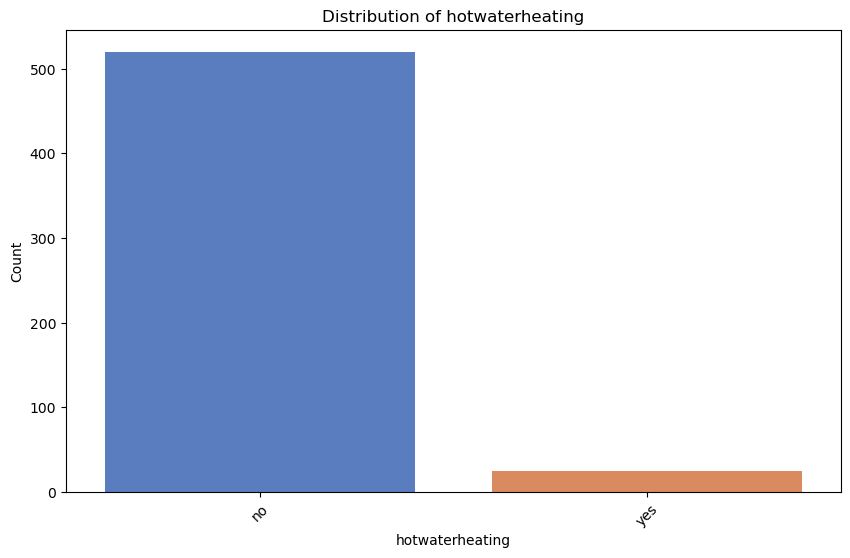

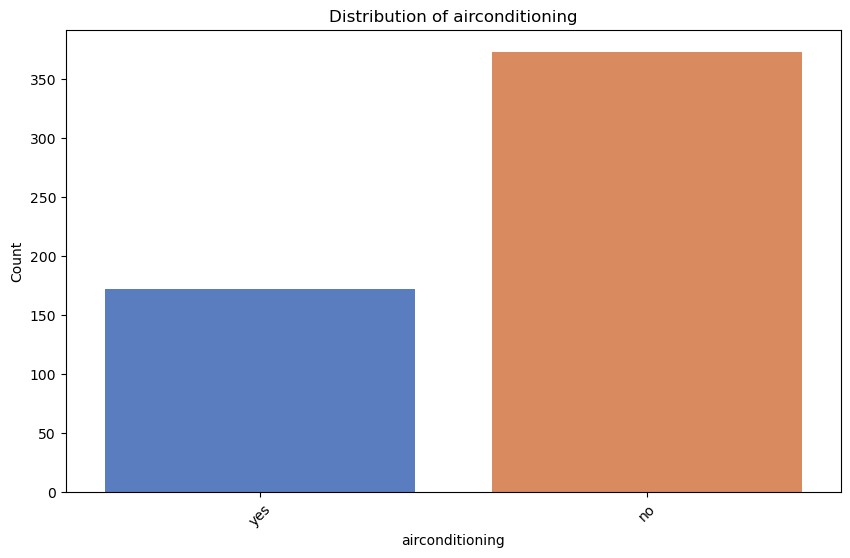

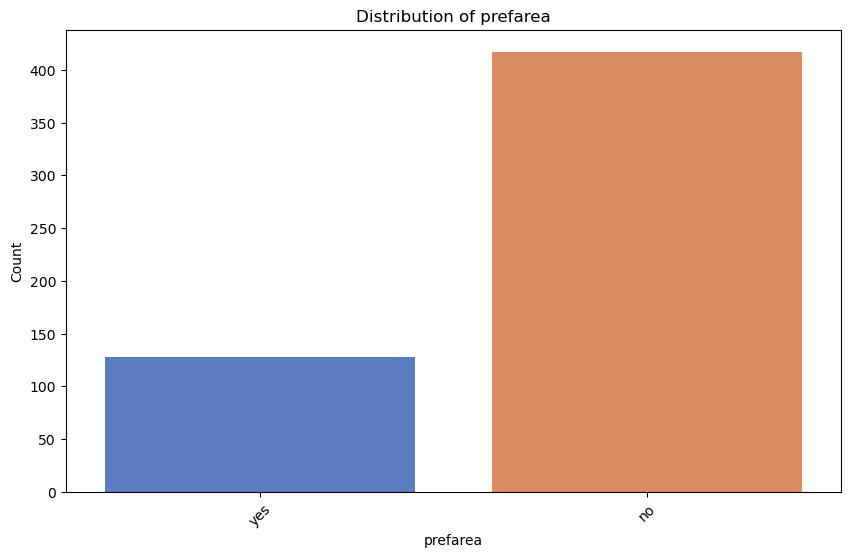

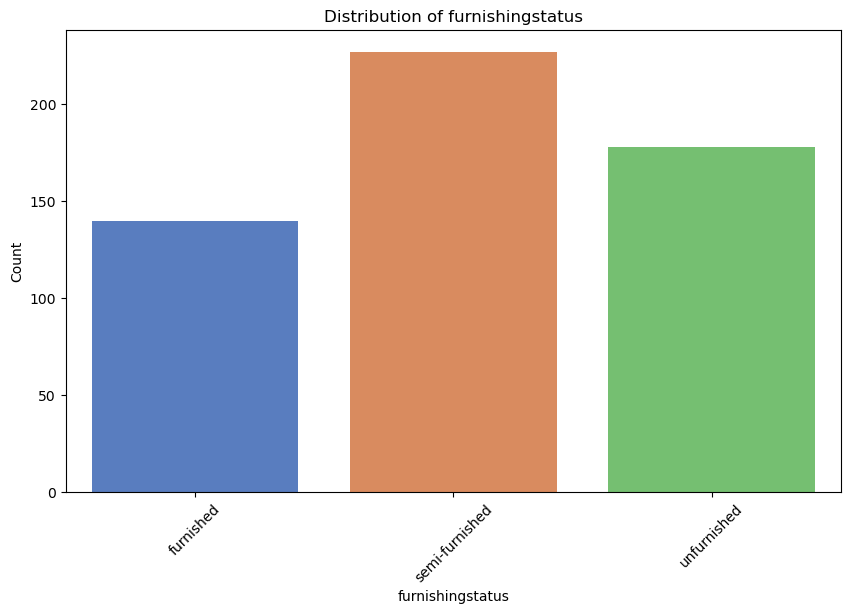

In [39]:
#analyze categorical features
# Analyze categorical features 
for feature in categorical_features:
    analyzer = FeatureAnalyzer(CategoricalFeature())
    analyzer.execute_analysis(df, feature)

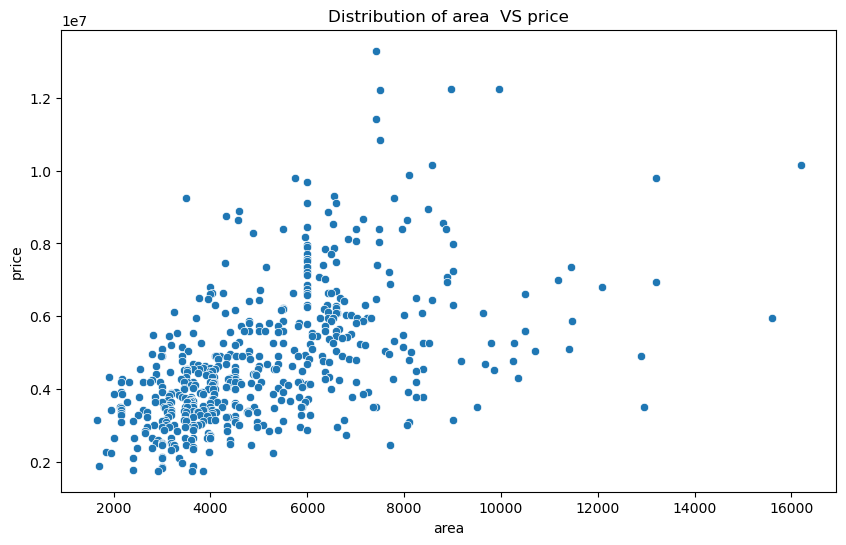

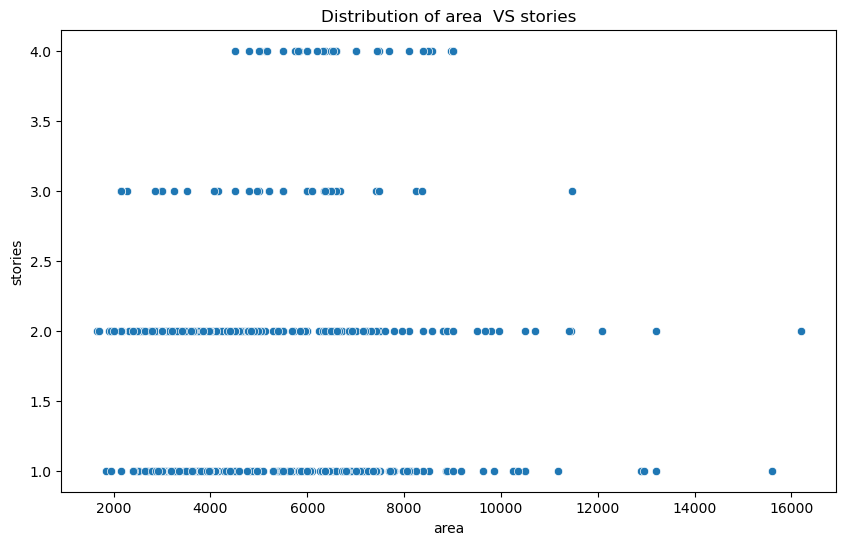

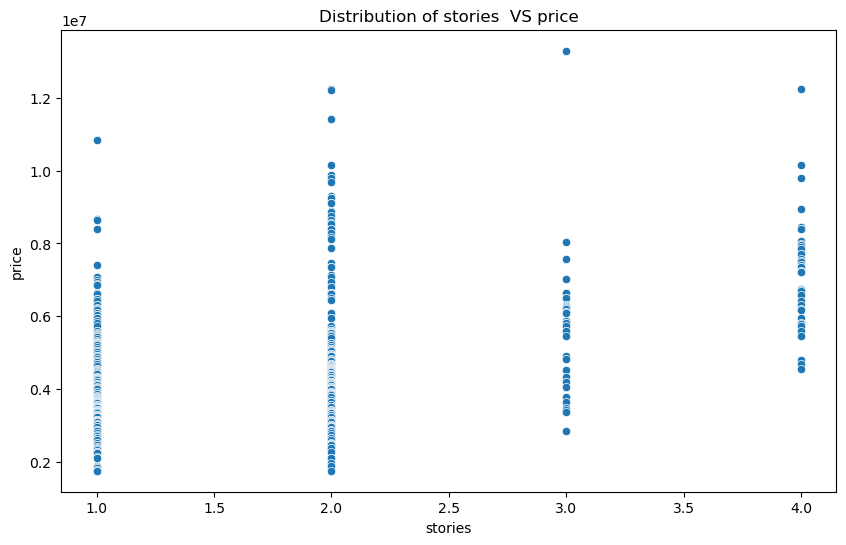

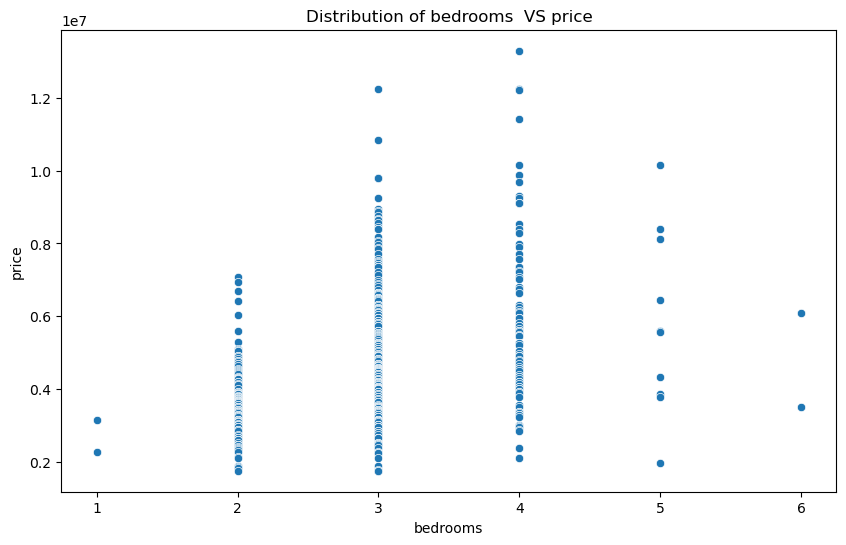

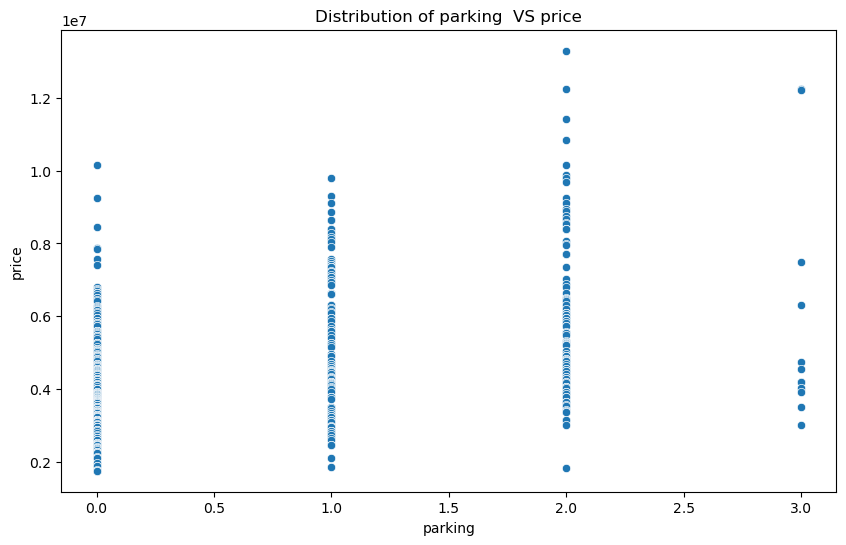

In [40]:
# STEP 3: FEATURE VS FEATURE ANALYSIS

# analyze relationship  between 2 numerical features
analyzer = FeaturesAnalyzer(NumericalVsNumerical())
analyzer.execute_analysis(df, 'area', 'price')
analyzer.execute_analysis(df, 'area', 'stories')
analyzer.execute_analysis(df, 'stories', 'price')
analyzer.execute_analysis(df, 'bedrooms', 'price')
analyzer.execute_analysis(df, 'parking', 'price')




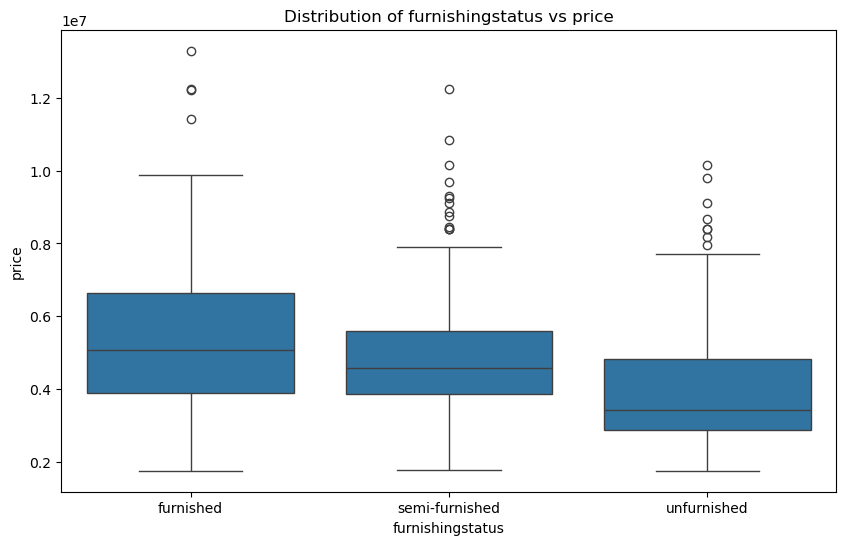

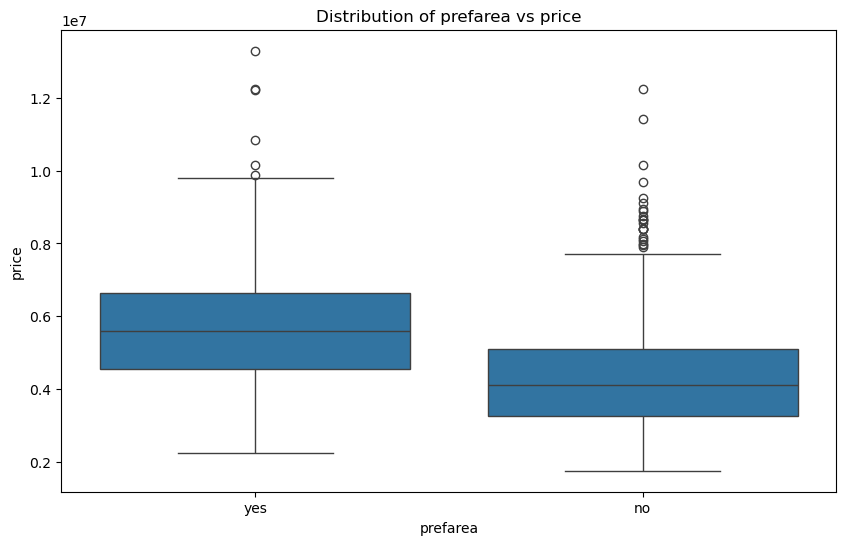

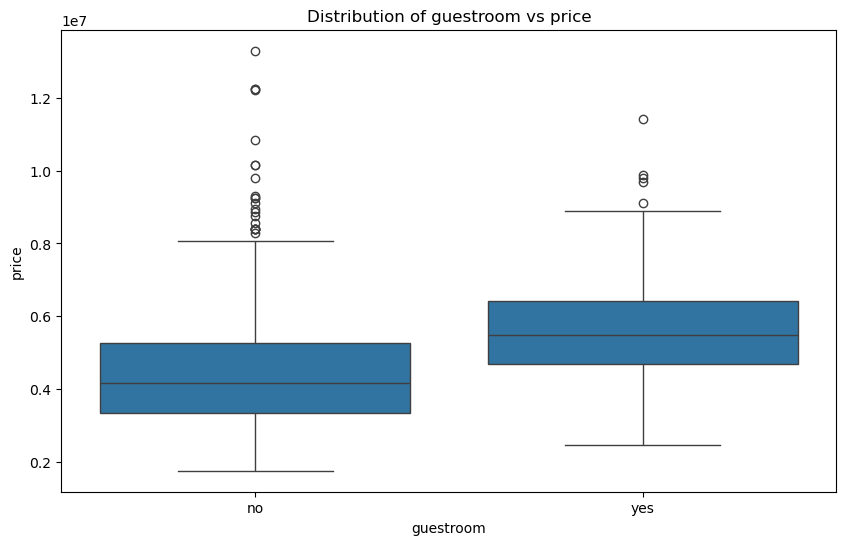

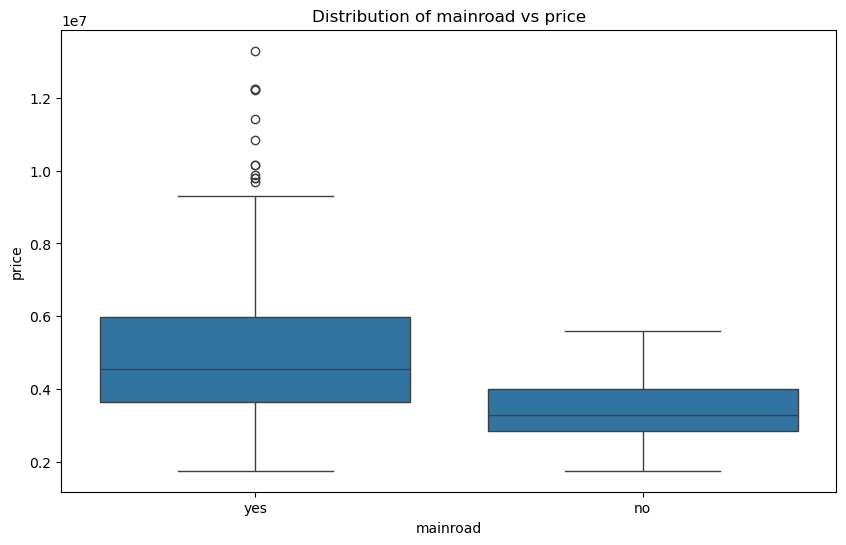

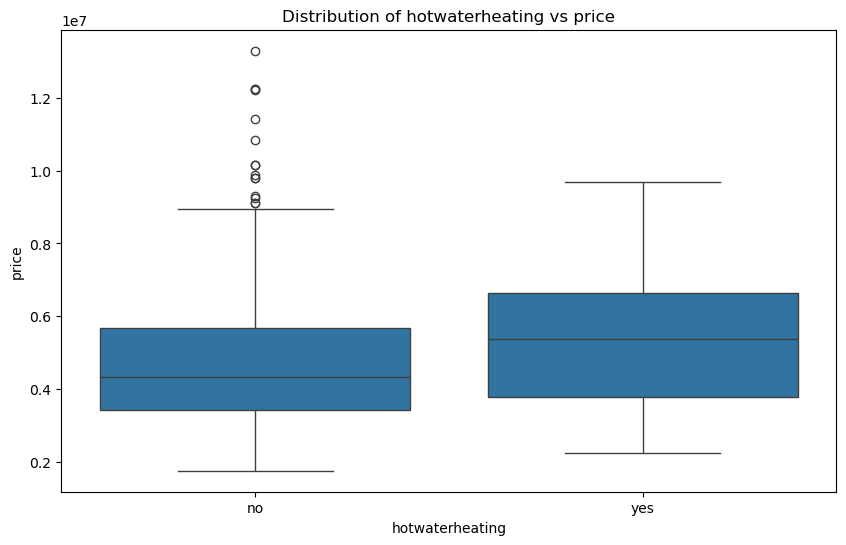

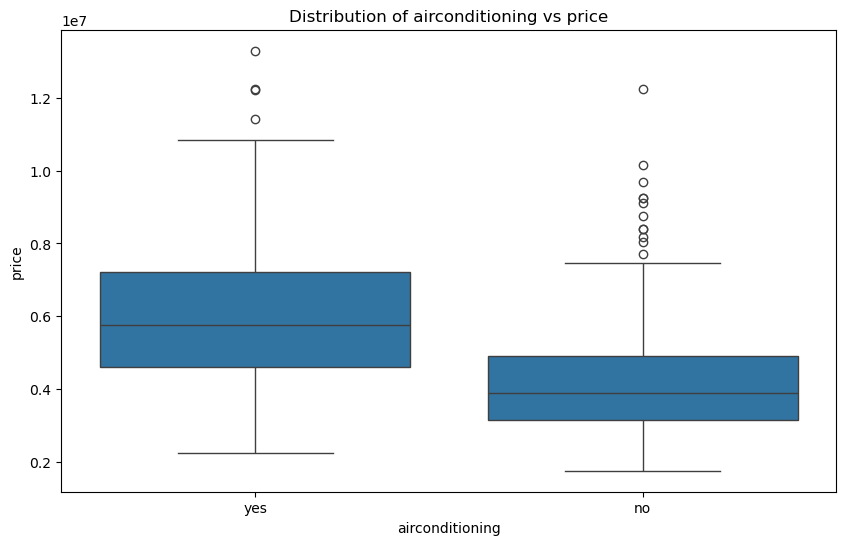

In [41]:
# analyze relationship  between categorical and numerical features
analyzer = FeaturesAnalyzer(CategoricalVsNumerical())
analyzer.execute_analysis(df, 'furnishingstatus', 'price')
analyzer.execute_analysis(df, 'prefarea', 'price')
analyzer.execute_analysis(df, 'guestroom', 'price')
analyzer.execute_analysis(df, 'mainroad', 'price')
analyzer.execute_analysis(df, 'hotwaterheating', 'price')
analyzer.execute_analysis(df, 'airconditioning', 'price')

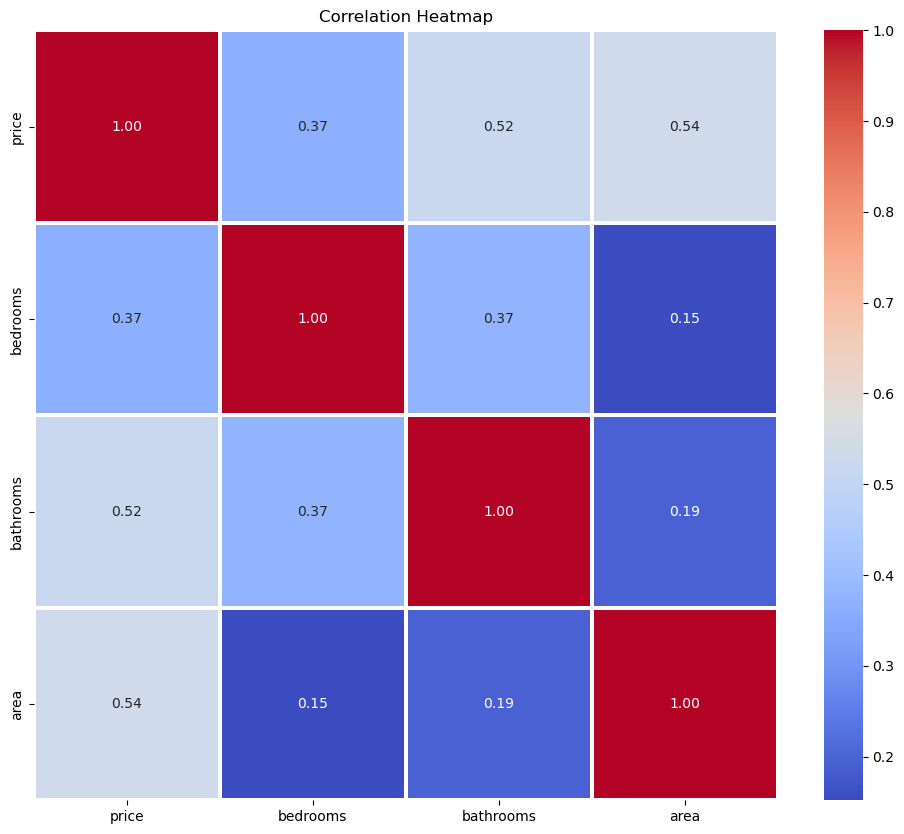

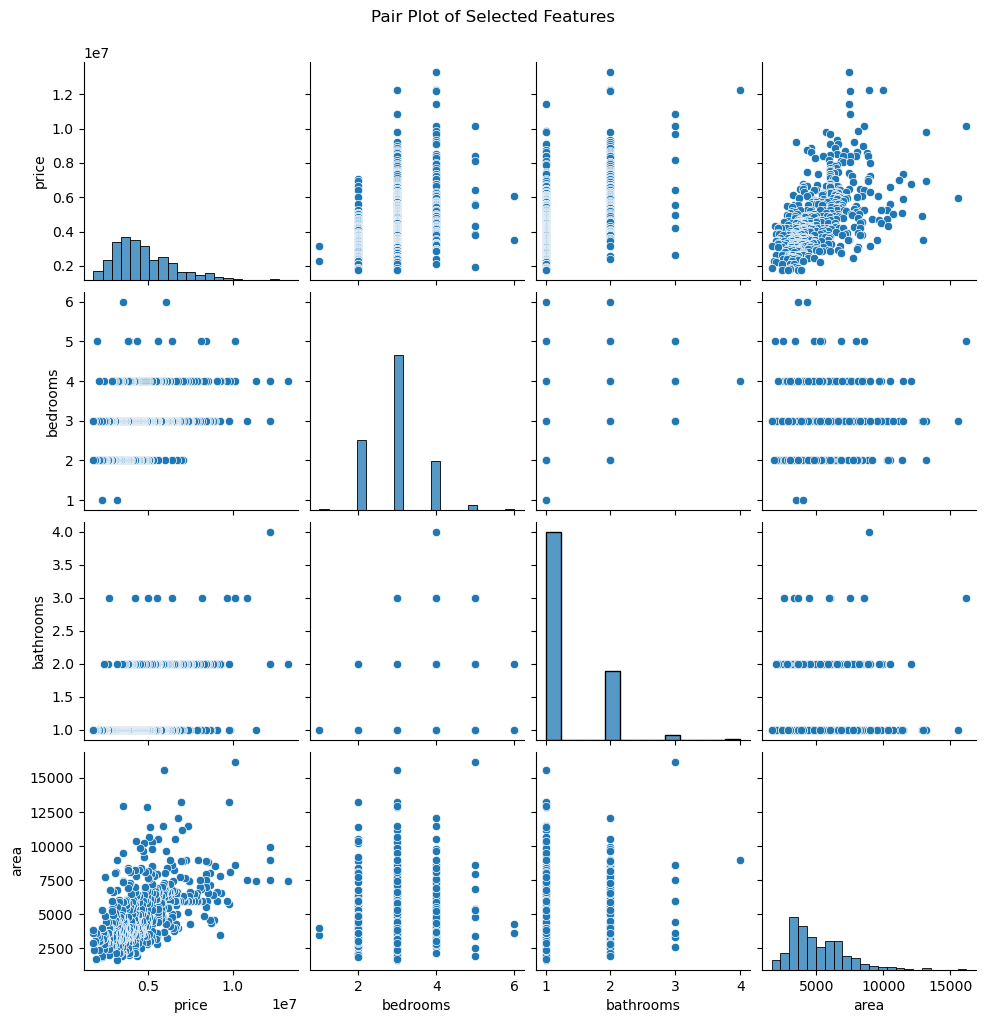

In [42]:
# STEP 4: MULTIPLE FEATURE ANALYSIS


# analyze relationship  between 2 numerical features
analyzer = MultiFeatureAnalyzer()
features = df[['price', 'bedrooms', 'bathrooms', 'area']]
analyzer.analyze(features)




 Missing Values Count by Column
Series([], dtype: int64)

 Visualizing Missing values...


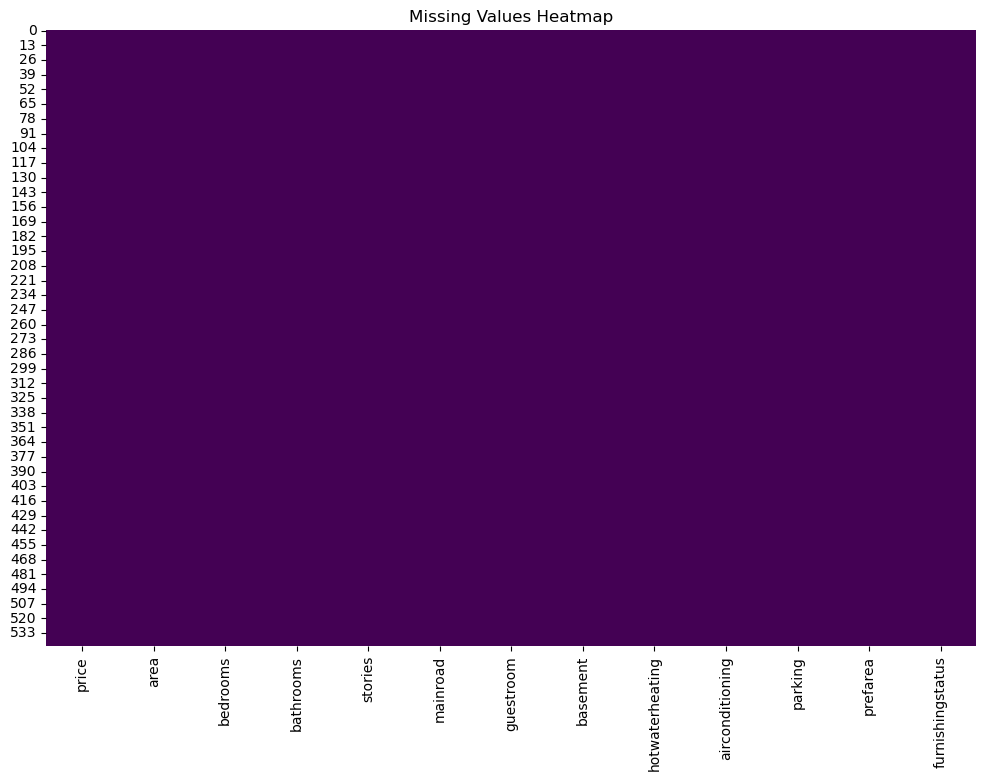

In [43]:
#STEP 5: Missing Value Analysis

# perfomrm missing value analysis
missing_value_analyzer = Missing_Value_Analysis()
missing_value_analyzer.analyze(df)
# Yellow marks represent null/ NaN values

# INSIGHTS DERIVED FROM THE ANALYSIS
## 1 Basic Data Analysis
- NOTES HERE

## 2 Feature Analysis
- NOTES HERE

## 3 Feature Vs Feature Analysis
- NOTES HERE

## 4 Muilti Feature Analysis
- NOTES HERE

## 5 Missing Values Analysis
- The Dataset has no missing values as shown by the diagram
- NB: If the there is yellow color shown in the heatmap plot it represent missing values